## Words frequency analysis (pipeline)

The needed libraries are downloaded in the cell below

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
#nltk.download("stopwords")
from nltk.tokenize import word_tokenize
import string
%matplotlib inline

In [2]:
# Importing the needed data for this analysis
text = pd.read_excel("Data for Bottom-Up Apporach.xlsx")

In [3]:
# To get a longer character display, if viewing the dataset
pd.set_option("display.max_colwidth", 100)

## For the purpose of this analysis the following steps are taken:
1. seperate the data using the Person column. 
2. combine the text data(Topics) for easy manipulation.
3. tokenize the combined dataset, so we have them as a list of words.
4. remove the punctuation marks which might have been returned as a word.
5. remove the stopwords which are not necessary for the analysis.
6. the number of unique occurences of each word and we make a plot of the result.

## Splitting the data using the Person columns

In [4]:
def extract_text(doc, person):
    """
    This function helps to extract text from different people for analysis on individually suggested topics.
    """
    return doc.loc[doc["Person"] == person]

## Combining the text dataset.

In [5]:
def combine_text(list_of_text):
    """
    This function combines text from different rows into a single row of text, using namespace as the separator.
    It takes the input inform of a Dataframe with the column with the text titled TOPICS.
    """
    combined = " ".join(list_of_text.Topics)
    return combined

## Creating a list of word from the text.

In [6]:
def word_tokenizer(c_text):
    """
    This function takes the combined words from the combine_text function and tokenize them into separate words.
    It returns a list of words.
    """
    tokenized = word_tokenize(c_text)
    return tokenized

## Removing punctuation marks

In [7]:
def remove_punc(txt_punct):
    """
    This function removes the punctuation marks in the tokenized words.
    It takes the tokenized words as the input.
    """
    txt_nopunc = [c for c in txt_punct  if c not in string.punctuation]
    return txt_nopunc

## Removing stopwords

In [8]:
stopwords = nltk.corpus.stopwords.words("english")
def remove_stopwords(txt_tokenized):
    """
    This is used to remove the unnecessary words from the text.
    """
    txt_clean = [word for word in txt_tokenized if word.lower() not in stopwords]
    return txt_clean

## Counting the frequency of the words.

In [9]:
def my_counter(no_punc_text, person):
    """
    This function takes the out of the remove_punc function and makes a count of the occurence of each distinct word.
    It also returns a plot of the most frequent words.
    """
    #person = input("Name of the person?")
    counts = pd.Series(no_punc_text).value_counts()[:10]
    plt.figure(figsize=(12, 5))
    #plot = plt.bar(counts.index, counts.values, color="Darksalmon");
    plot_sns = sns.barplot(counts.index, counts.values, color = "lightskyblue", palette="rocket")
    plt.title("Plot of most frequent words from " + person)
    plt.xticks(rotation = 20)
    plt.xlabel("Frequently occuring words")
    plt.ylabel("Frequency")
    plt.grid()
    return plt.show(plot_sns)

## To analyse the text data

In [10]:
def analysis(txxt):
    """
    This function takes the input as the dataset and it performs the analysis given certain conditions.
    It produces a plot of the most frequent words in the list of topics.
    """
    # This prompt a question about who the analysis is about.
    person = input("Input the name of the person: ")
    #If the answer provided for the question is in the person column, analysis is done on individuals.
    if person in txxt.Person.unique():
        extracted = extract_text(txxt, person)
        combined_txxt = combine_text(extracted)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return my_counter(no_stopwords, person)
    # If the answer is not in the person column it carries out the analysis on all the dataset.
    else:
        combined_txxt = combine_text(txxt)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return my_counter(no_stopwords, person)

In [11]:
ex = extract_text(text, "Walter")
com = combine_text(ex)
toke = word_tokenizer(com)
puncs = remove_punc(toke)
stop = remove_stopwords(puncs)

In [12]:
walter = combine_text(text)

In [13]:
walter = word_tokenizer(walter)

In [14]:
walter = remove_punc(walter)

In [15]:
walter = remove_stopwords(walter)

## For Walter

Input the name of the person: Walter


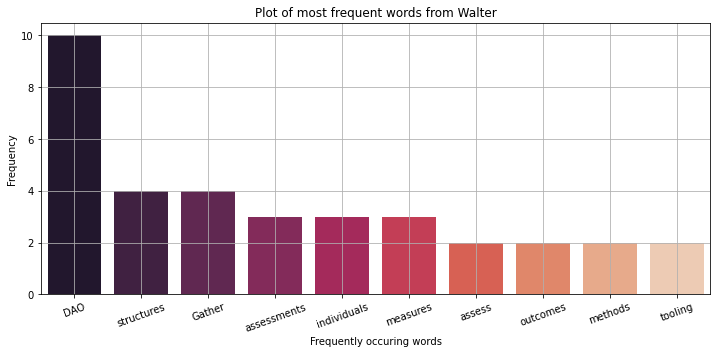

In [11]:
analysis(text)

## For Elbeth

Input the name of the person: Elbeth


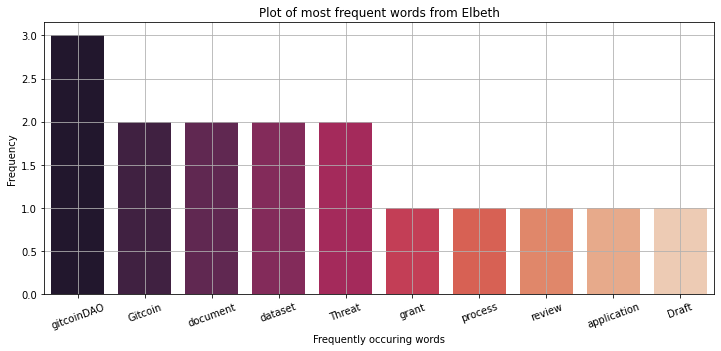

In [23]:
analysis(text)

## For BFA

Input the name of the person: BFA


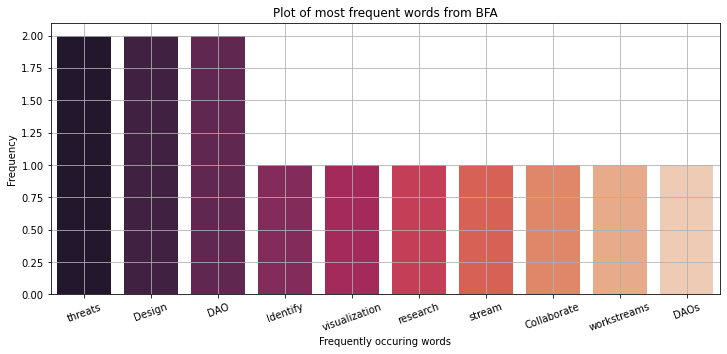

In [24]:
analysis(text)

## For Zerb

Input the name of the person: Zerb


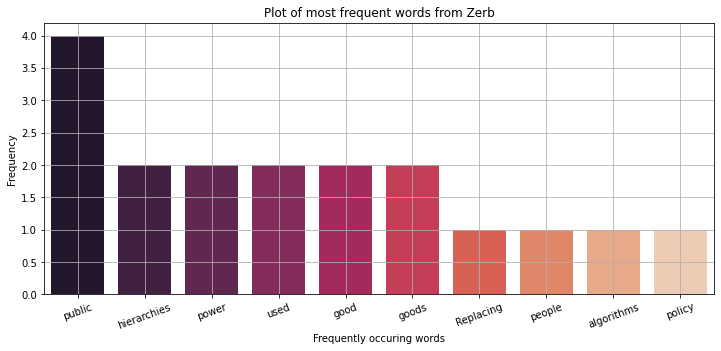

In [25]:
analysis(text)

## For the entire dataset

Input the name of the person: Everybody


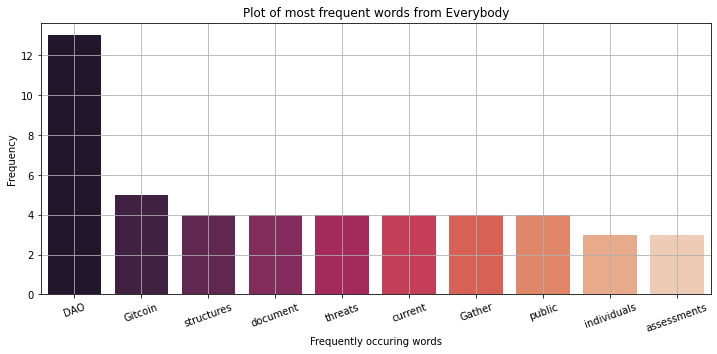

In [26]:
analysis(text)

In [16]:
def analyse(txxt):
    """
    This function does all the processing.
    It takes the dataframe as the as the input data.
    """
    combined_txxt = combine_text(txxt)
    tokenized_txxt = word_tokenizer(combined_txxt)
    no_puncs_txxt = remove_punc(tokenized_txxt)
    no_stopwords = remove_stopwords(no_puncs_txxt)
    return my_counter(no_stopwords)

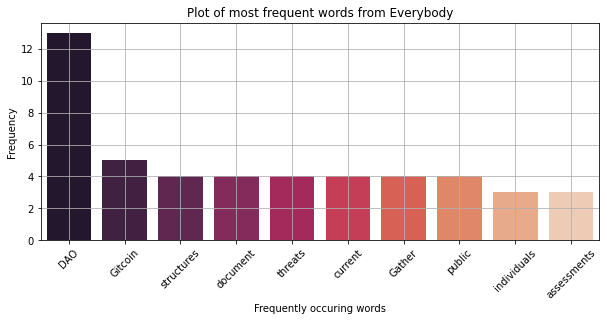

## Twitter data analysis

In [11]:
fraud = pd.read_csv("./fraud - fraud.csv")
sybil = pd.read_csv("./sybil - sybil.csv")
attack = pd.read_csv("./data - data.csv")
token = pd.read_csv("./token - token.csv")
dao = pd.read_csv("./dao - dao.csv")
internal = pd.read_csv("./internal_attack - internal_attack.csv")
external = pd.read_csv("./external_attack - external_attack.csv")

In [12]:
fraud.drop("Unnamed: 0", inplace=True, axis=1)
sybil.drop("Unnamed: 0", inplace=True, axis=1)
attack.drop("Unnamed: 0", inplace=True, axis=1)
token.drop("Unnamed: 0", inplace=True, axis=1)
dao.drop("Unnamed: 0", inplace=True, axis=1)
internal.drop("Unnamed: 0", inplace=True, axis=1)
external.drop("Unnamed: 0", inplace=True, axis=1)

In [13]:
def tweets_combiner_tweets(doc):
    combined = " ".join(doc.Tweets)
    return combined

In [14]:
def remove_punc(txt_punct):
    """
    This function removes the punctuation marks in the tokenized words.
    It takes the tokenized words as the input.
    """
    not_puncs = [word for word in txt_punct if word not in ["’", "'s", "n't", "''", "...", "``", "“", "”", "https", "would", "get", "like","love", "'m"]]
    txt_nopunc = [c.lower() for c in not_puncs  if c not in string.punctuation]
    return txt_nopunc

In [15]:
def analyse_tweets(doc):
    hashtag = input("What hashtag is provoded:")
    combined = tweets_combiner_tweets(doc)
    tokenized_words = word_tokenizer(combined)
    zero_puncs = remove_punc(tokenized_words)
    no_stopwords = remove_stopwords(zero_puncs)
    return my_counter(no_stopwords, hashtag)

In [16]:
def analysis_with_doughnut_chart(txxt):
    """
    This function takes the input as the dataset and it performs the analysis given certain conditions.
    It produces a plot of the most frequent words in the list of topics.
    """
    # This prompt a question about who the analysis is about.
    person = input("Input the name of the person: ")
    #If the answer provided for the question is in the person column, analysis is done on individuals.
    if person in txxt.Person.unique():
        extracted = extract_text(txxt, person)
        combined_txxt = combine_text(extracted)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return doughnut_chart_maker(no_stopwords, person)
    # If the answer is not in the person column it carries out the analysis on all the dataset.
    else:
        combined_txxt = combine_text(txxt)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return doughnut_chart_maker(no_stopwords, person)

In [17]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", contour_color="steelblue")

def make_word_cloud_tweets(document):
    hashtag = input("hashtag: ")
    cloud = tweets_combiner_tweets(document)
    words = cloud.split()
    table = str.maketrans("", "", string.punctuation)
    stripped = [w.translate(table) for w in words]
    no_stops = remove_stopwords(stripped)
    assembled = " ".join(no_stops)
    plt.figure(figsize=(15, 10))
    wc.generate(assembled)
    plt.imshow(wc, interpolation="bilinear")
    plt.title("Plots of data scraped from Twitter #" + hashtag)
    plt.axis("off")
    plt.show()

hashtag: fraud


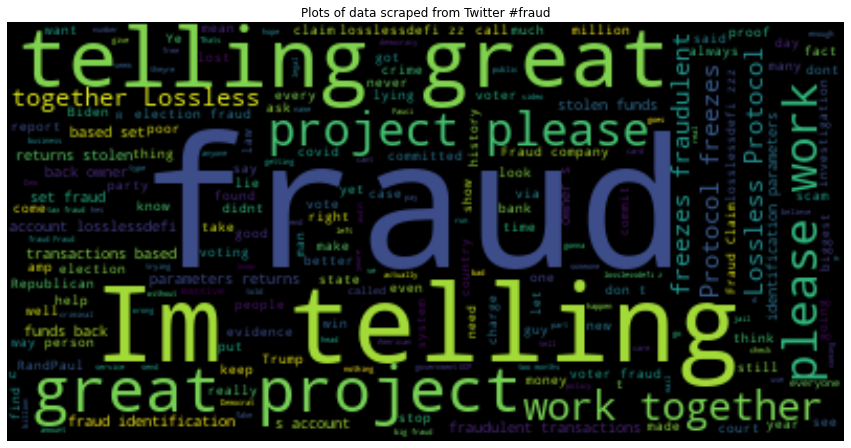

In [97]:
make_word_cloud_tweets(fraud)

hashtag: DAO


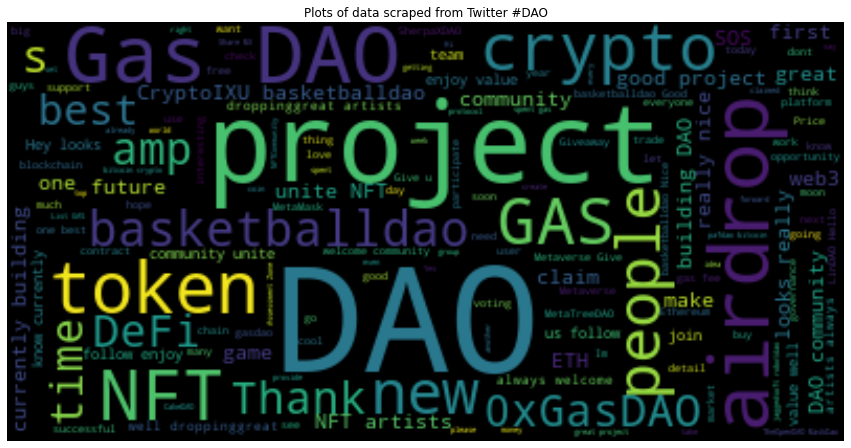

In [98]:
make_word_cloud_tweets(dao)

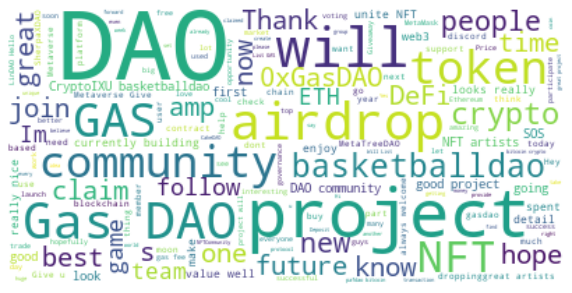

hashtag: Sybil


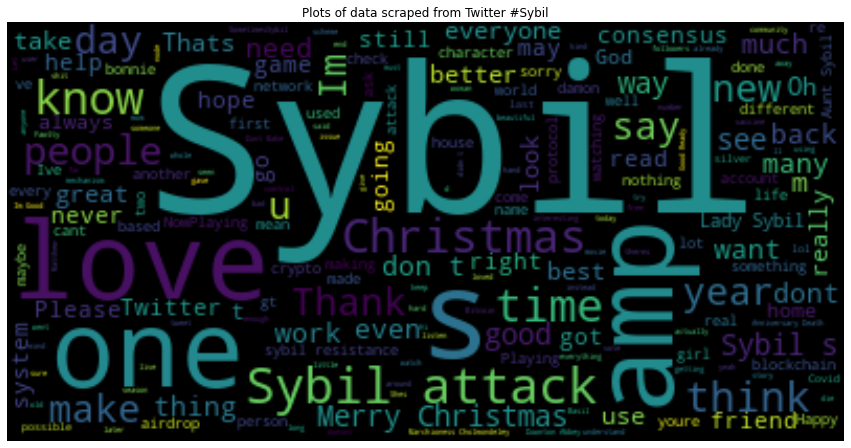

In [99]:
make_word_cloud_tweets(sybil)

hashtag: Internal


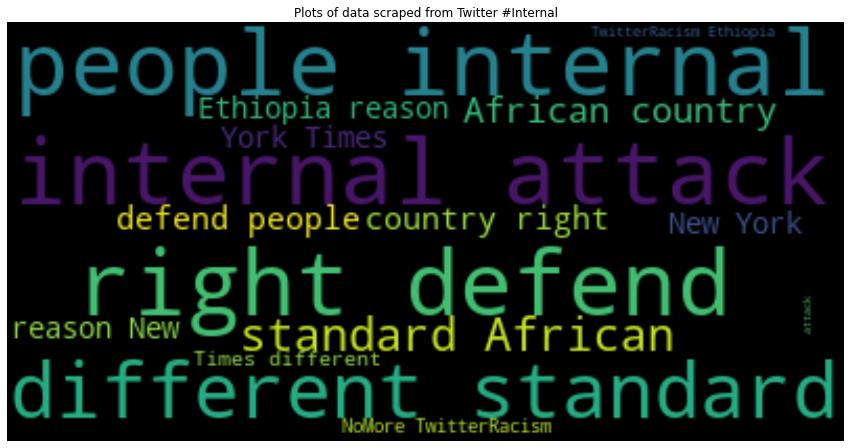

In [101]:
make_word_cloud_tweets(internal)

hashtag: External


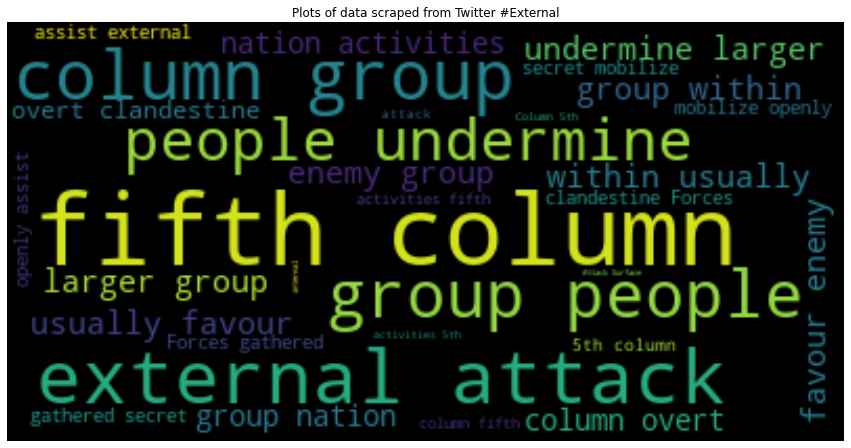

In [102]:
make_word_cloud_tweets(external)

hashtag: Attack


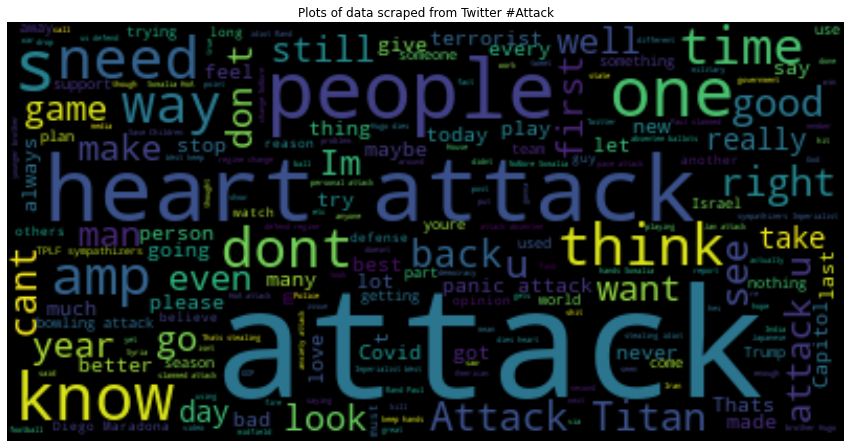

In [103]:
make_word_cloud_tweets(attack)

In [18]:
def create_a_square_plot_tweets(doc):
    texts = tweets_combiner_tweets(doc)
    tokenized = word_tokenizer(texts)
    no_punctuations = remove_punc(tokenized)
    no_stops = remove_stopwords(no_punctuations)
    plt.figure(figsize=(10,8), dpi= 90)
    squarify.plot(sizes=pd.Series(no_stops).value_counts()[:10].values,
                  label=pd.Series(no_stops).value_counts()[:10].keys(),
                  color = [plt.cm.Spectral(i/float(10)) for i in range(10)],
                  #color="pink",
                  alpha=.8)
    plt.axis("off")
    plt.show()

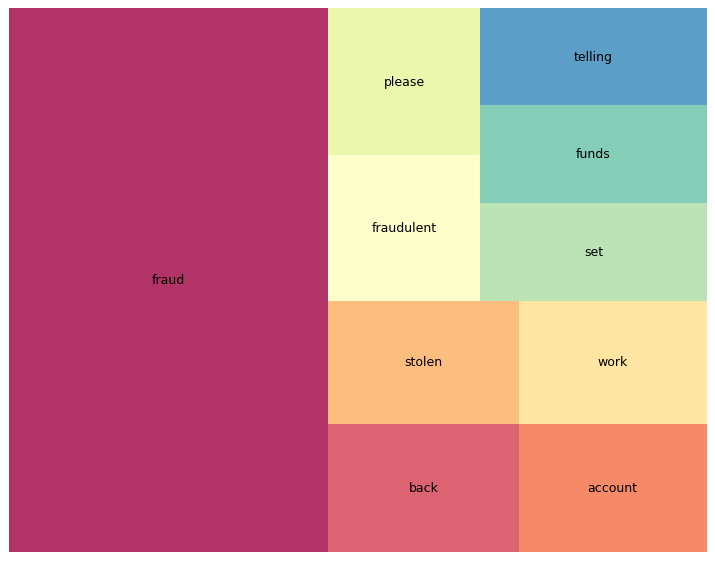

In [111]:
create_a_square_plot_tweets(fraud)

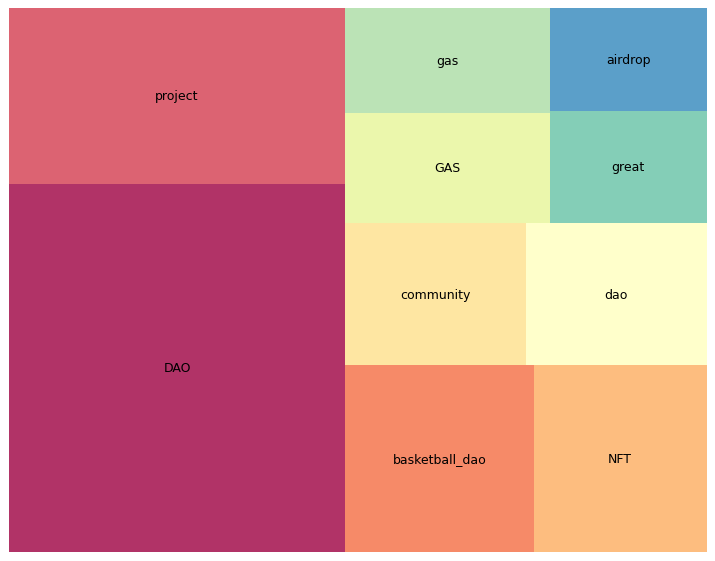

In [112]:
create_a_square_plot_tweets(dao)

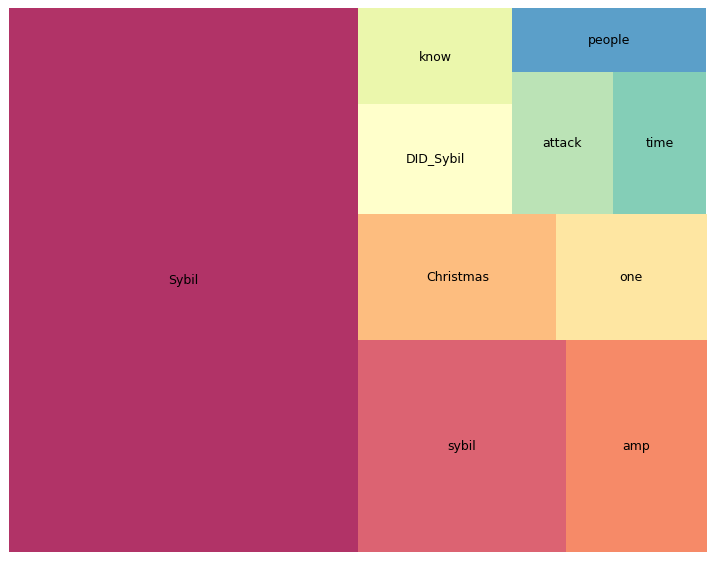

In [113]:
create_a_square_plot_tweets(sybil)

What hashtag is provoded:fraud


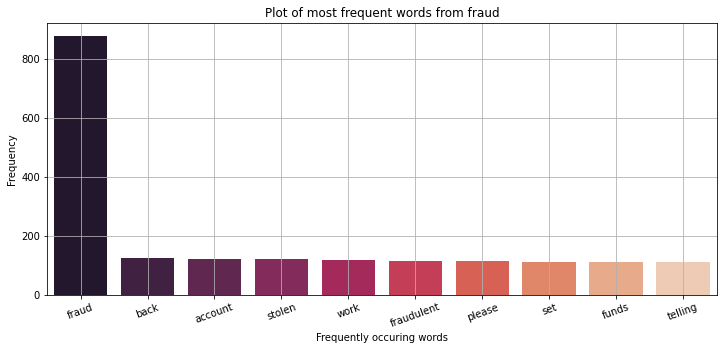

In [37]:
analyse_tweets(fraud)

What hashtag is provoded:token


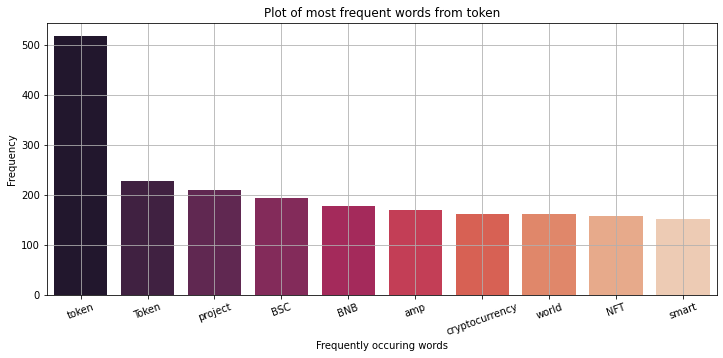

In [38]:
analyse_tweets(token)

What hashtag is provoded:attack


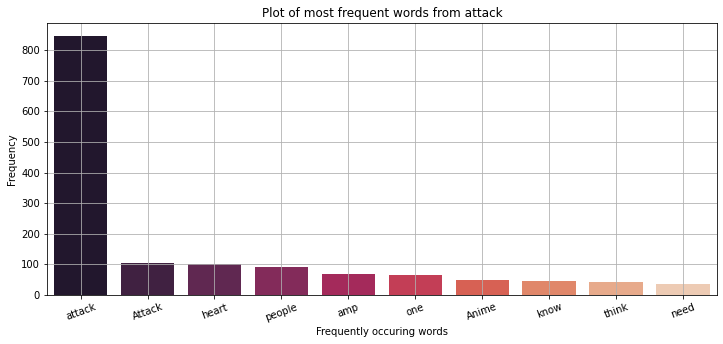

In [39]:
analyse_tweets(attack)

In [33]:
def word_tokenizer(c_text):
    """
    This function takes the combined words from the combine_text function and tokenize them into separate words.
    It returns a list of words.
    """
    tokenized = word_tokenize(c_text)
    return tokenized

What hashtag is provoded:Sybil


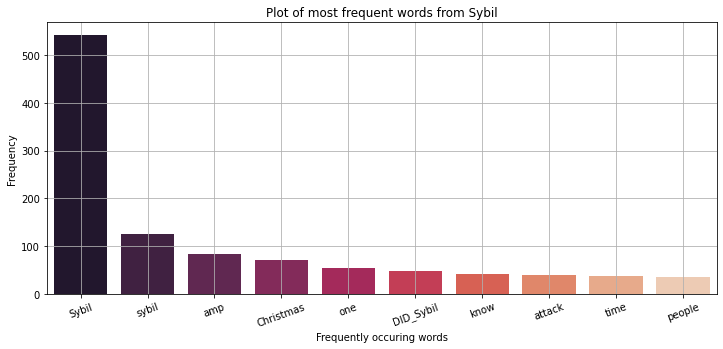

In [116]:
analyse_tweets(sybil)

# Websites analysis

In [135]:
first_blog = pd.read_csv("./First_blog.csv")

In [136]:
first_blog.dropna(inplace=True)

In [137]:
first_blog

Paragraphs
0                                                        Be the first to know about newly funded issues!
2    The Fraud Detection & Defense (FDD) workstream of GitcoinDAO is responsible for detecting and de...
3    This began with the launch of the GTC governance token. The FDD workstream budget was approved a...
4    The future of sybil detection includes a “community data lake” with anonymized data allowing dat...
5    The insights from this information will be exported to the community in a decentralized version ...
..                                                                                                   ...
96   Fractal layers of curation are the best opportunity for building verifiable unique human identit...
97   This DAO would be governed by a non-transferable governance token guiding its decision making wi...
98   There are public goods questions which machine learning models can help us better understand. Th...
100  This article was written by collectively with contributors including Disruption Joe, Blockscienc...
101  Gitcoin is a platform for you to get paid for working on open source software in Python, Rust, R...

[100 rows x 1 columns]

In [19]:
def websites_combiner(doc):
    combined = " ".join(doc.Paragraphs)
    return combined

In [20]:
def analyse_webpages(doc):
    hashtag = input("What website is provoded:")
    combined = websites_combiner(doc)
    tokenized_words = word_tokenizer(combined)
    zero_puncs = remove_punc(tokenized_words)
    no_stopwords = remove_stopwords(zero_puncs)
    return my_counter(no_stopwords, hashtag)

What website is provoded:First website


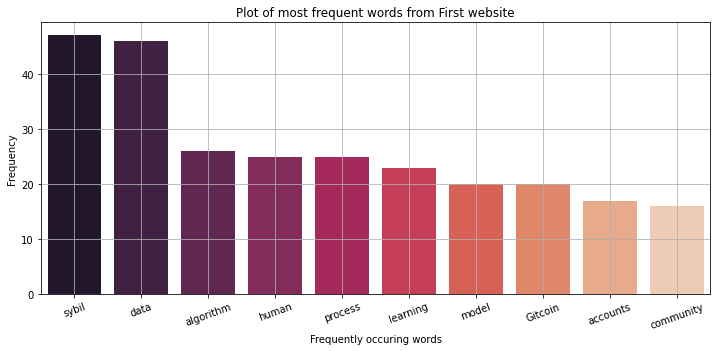

In [55]:
analyse_webpages(first_blog)

In [140]:
second_page = pd.read_csv("./Second_blog.csv")

What website is provoded:Second website


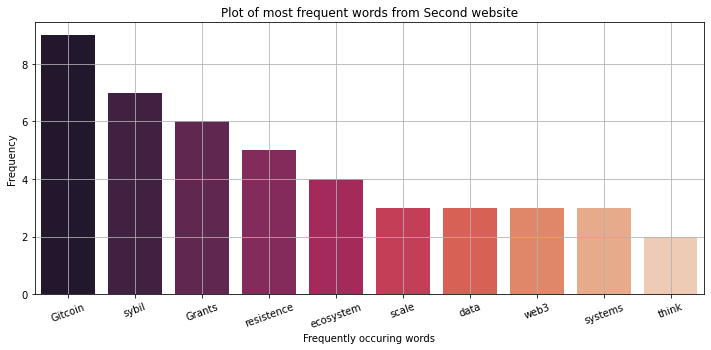

In [57]:
analyse_webpages(second_page)

## Creating a Decomposition tree for web data

In [58]:
import squarify

In [21]:
def create_a_square_plot(doc):
    texts = tweets_combiner_websites(doc)
    tokenized = word_tokenizer(texts)
    no_punctuations = remove_punc(tokenized)
    no_stops = remove_stopwords(no_punctuations)
    plt.figure(figsize=(12,8), dpi= 100)
    squarify.plot(sizes=pd.Series(no_stops).value_counts()[:10].values,
                  label=pd.Series(no_stops).value_counts()[:10].keys(),
                  color = [plt.cm.Spectral(i/float(10)) for i in range(10)],
                  #color="pink",
                  alpha=.8)
    plt.axis("off")
    plt.show()

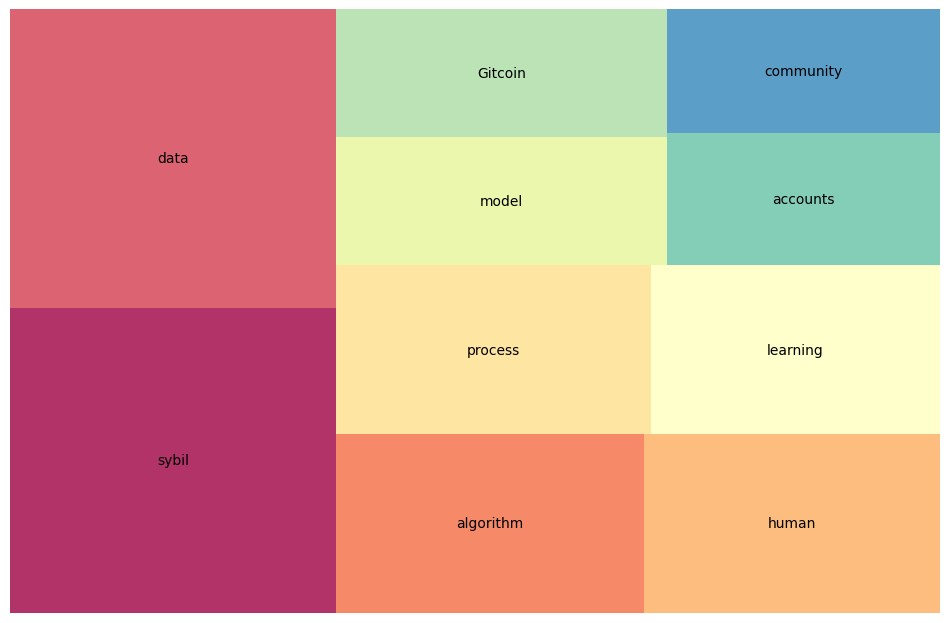

In [86]:
create_a_square_plot(first_blog)

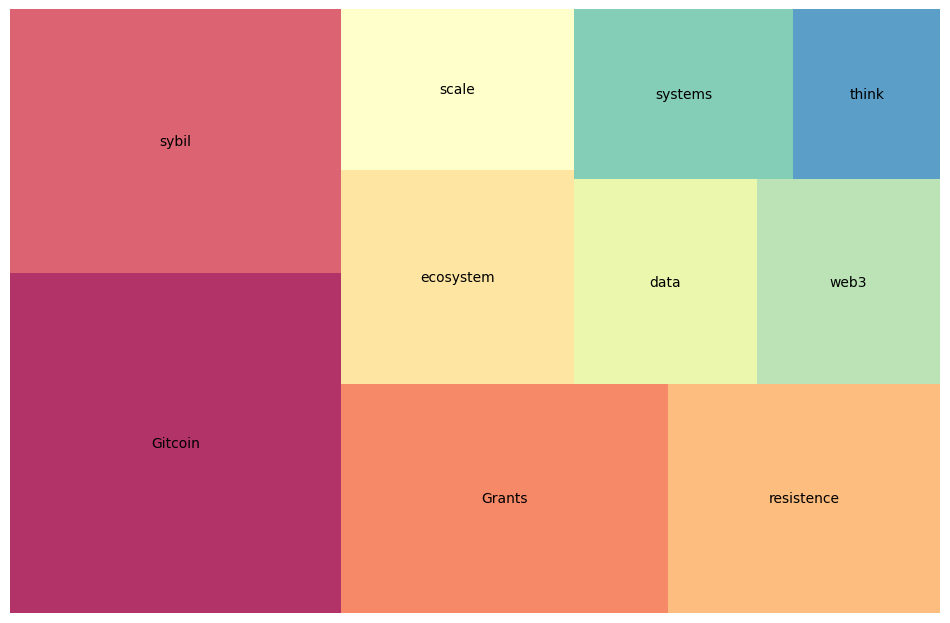

In [87]:
create_a_square_plot(second_page)

In [22]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", contour_color="steelblue")

def make_word_cloud_websites(document):
    cloud = tweets_combiner_websites(document)
    words = cloud.split()
    table = str.maketrans("", "", string.punctuation)
    stripped = [w.translate(table) for w in words]
    no_stops = remove_stopwords(stripped)
    assembled = " ".join(no_stops)
    plt.figure(figsize=(15, 10))
    wc.generate(assembled)
    plt.imshow(wc, interpolation="bilinear")
    plt.title("Plots of data scraped from websites")
    plt.axis("off")
    plt.show()

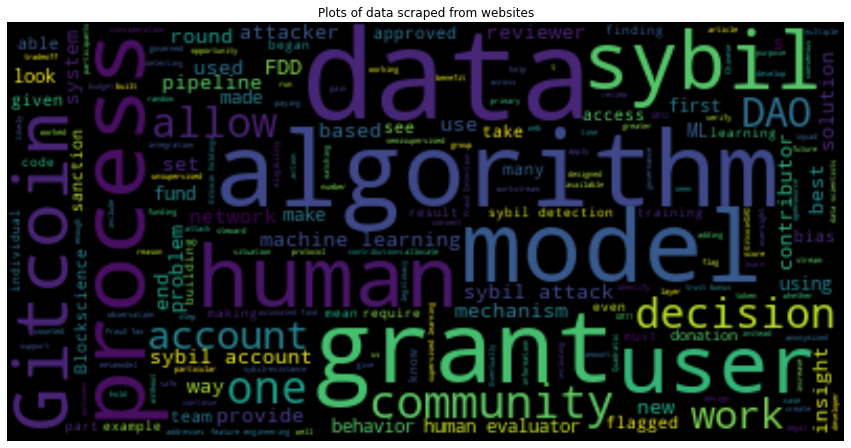

In [89]:
make_word_cloud_websites(first_blog)

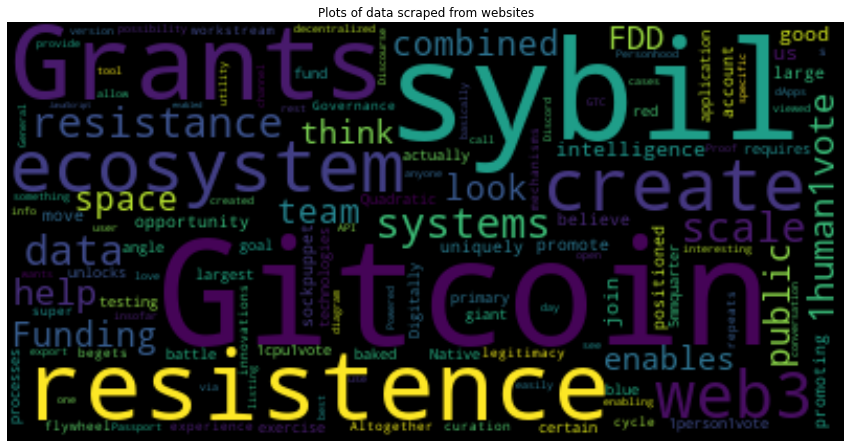

In [90]:
make_word_cloud_websites(second_page)

In [23]:
def doughnut_chart_maker(no_punc_text, person):
    """
    This function takes the out of the remove_punc function and makes a count of the occurence of each distinct word.
    It also returns a plot of the most frequent words.
    """
    counts = pd.Series(no_punc_text).value_counts()[:10].values
    labels = pd.Series(no_punc_text).value_counts()[:10].keys()
    plt.figure(figsize=(6, 5))
    plt.style.use("default")
    plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
    circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
    plt.gca().add_artist(circle)
    plt.title("Plot of most frequent words from " + person, weight='bold', size=14)
    plt.axis("equal")
    plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
    return plt.show()

In [24]:
def bowyer_doughnut(no_punc_text, person):
    """
    This function takes the out of the remove_punc function and makes a count of the occurence of each distinct word.
    It also returns a plot of the most frequent words.
    """
    counts = pd.Series(no_punc_text).value_counts()[:5].values
    labels = pd.Series(no_punc_text).value_counts()[:5].keys()
    plt.figure(figsize=(6, 5))
    plt.style.use("default")
    plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
    circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
    plt.gca().add_artist(circle)
    plt.title("Plot of most frequent words from " + person, weight='bold', size=14)
    plt.axis("equal")
    plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
    return plt.show()

In [25]:
def analysis_with_doughnut_chart(txxt):
    """
    This function takes the input as the dataset and it performs the analysis given certain conditions.
    It produces a plot of the most frequent words in the list of topics.
    """
    # This prompt a question about who the analysis is about.
    person = input("Input the name of the person: ")
    #If the answer provided for the question is in the person column, analysis is done on individuals.
    if person in txxt.Person.unique():
        extracted = extract_text(txxt, person)
        combined_txxt = combine_text(extracted)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return doughnut_chart_maker(no_stopwords, person)
    # If the answer is not in the person column it carries out the analysis on all the dataset.
    else:
        combined_txxt = combine_text(txxt)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return doughnut_chart_maker(no_stopwords, person)

Input the name of the person: Everybosy


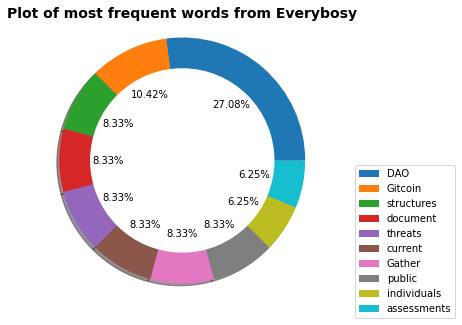

In [14]:
analysis_with_doughnut_chart(text)

In [26]:
def pie_chart_maker(no_punc_text, person):
    """
    This function takes the out of the remove_punc function and makes a count of the occurence of each distinct word.
    It also returns a plot of the most frequent words.
    """
    counts = pd.Series(no_punc_text).value_counts()[:10].values
    labels = pd.Series(no_punc_text).value_counts()[:10].keys()
    plt.figure(figsize=(6, 5))
    explode = [0.12, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0]
    plt.pie(counts, autopct= "%.2f%%", shadow=True, explode=explode)
    #plot = plt.bar(counts.index, counts.values, color="Darksalmon");
    #plot_sns = sns.barplot(counts.index, counts.values, color = "lightskyblue", palette="rocket")
    plt.title("Plot of most frequent words from " + person,  weight='bold', size=14)
    plt.axis("equal")
    plt.legend(labels=labels, loc="best", bbox_to_anchor=(1,0.5))
    #plt.xticks(rotation = 20)
    #plt.xlabel("Frequently occuring words")
    #plt.ylabel("Frequency")
    #plt.grid()
    return plt.show()

In [27]:
def analysis_with_pie_chart(txxt):
    """
    This function takes the input as the dataset and it performs the analysis given certain conditions.
    It produces a plot of the most frequent words in the list of topics.
    """
    # This prompt a question about who the analysis is about.
    person = input("Input the name of the person: ")
    #If the answer provided for the question is in the person column, analysis is done on individuals.
    if person in txxt.Person.unique():
        extracted = extract_text(txxt, person)
        combined_txxt = combine_text(extracted)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return pie_chart_maker(no_stopwords, person)
    # If the answer is not in the person column it carries out the analysis on all the dataset.
    else:
        combined_txxt = combine_text(txxt)
        tokenized_txxt = word_tokenizer(combined_txxt)
        no_puncs_txxt = remove_punc(tokenized_txxt)
        no_stopwords = remove_stopwords(no_puncs_txxt)
        return pie_chart_maker(no_stopwords, person)

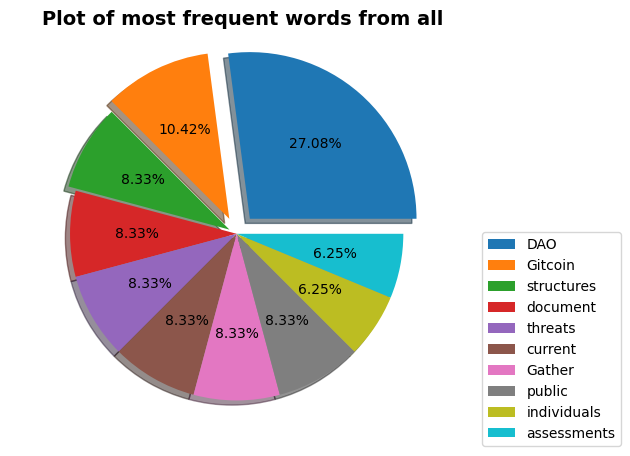

In [71]:
analysis_with_pie_chart(text)

## Kevin-Bowyer Algorithm

In [28]:
# Function to find majority element
def findMajority(arr, n):
	candidate = -1
	votes = 0
	
	# Finding majority candidate
	for i in range (n):
		if (votes == 0):
			candidate = arr[i]
			votes = 1
		else:
			if (arr[i] == candidate):
				votes += 1
			else:
				votes -= 1
	count = 0
	
	# Checking if majority candidate occurs more than n/2
	# times
	for i in range (n):
		if (arr[i] == candidate):
			count += 1
			
	if (count > n // 2):
		return candidate
	else:
		return "not found."

# Driver Code

arr = [ 1, 1, 1, 2, 2, 3, 1 ]
n = len(arr)
majority = findMajority(arr, n)
print(" The majority element is :" ,majority)
	


 The majority element is : 1


In [29]:
def finding_max(array): 
    """
    This function helps to process the data and pass it into the algorithm.
    """
    combined = tweets_combiner_tweets(array)
    tokenized_words = word_tokenizer(combined)
    no_punctuations = remove_punc(tokenized_words)
    words = remove_stopwords(no_punctuations)

    #This takes the list of most occuring words in a the whole word space.
    #Then we take the first 5 of them which makes it suitable for the dataset.
    counts = pd.Series(words).value_counts()[:5]

    # we append each instace of the most occuring words in the whole dataset to a list (frequent_words).
    #whilst we keep the number of instances intact.
    frequent_words = []
    for i in words:
        if i in counts.keys():
            frequent_words.append(i)
    
    # We change all the words in frequent_words to lower case.
    # So that it keeps all the instance of a word the same irrespective of the case. 
    lowered = [i.lower() for i in frequent_words]
    
    # We apply the Kevin Bowyer algorithm to the list here.
    majority = findMajority(lowered, len(lowered))
    return print("The majority is", majority)

In [30]:
from nltk.tokenize import sent_tokenize

def analyse_tweets_pie(doc):
    hashtag = input("What hashtag is provoded:")
    combined = tweets_combiner_tweets(doc)
    tokenized_words = word_tokenizer(combined)
    zero_puncs = remove_punc(tokenized_words)
    no_stopwords = remove_stopwords(zero_puncs)
    return bowyer_doughnut(no_stopwords, hashtag)


def analyse_tweets_with_phrase(doc):
    hashtag = input("What hashtag is provoded:")
    combined = tweets_combiner_tweets(doc)
    tokenized_words = sent_tokenize(combined)
    
    statement = []
    for j in range(len(tokenized_words)):
        for i in range(len(tokenized_words[j].split("."))):
            statement = tokenized_T[j].split(",")[i]
            statements_T.append(statement)
    return bowyer_doughnut(no_stopwords, hashtag)

## Applying the function to the hashtags dataset.

In [180]:
finding_max(fraud)

The majority is fraud


What hashtag is provoded:Fraud


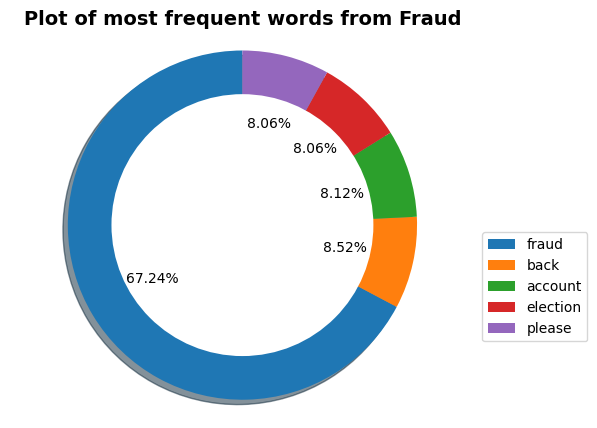

In [100]:
analyse_tweets_pie(fraud)

What hashtag is provoded:Token


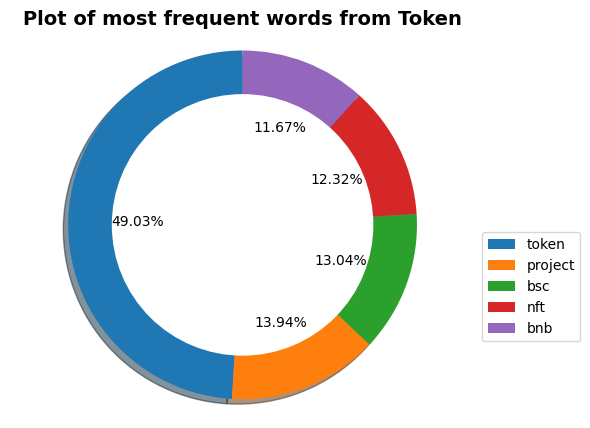

In [55]:
analyse_tweets_pie(token)

In [181]:
finding_max(dao)

The majority is not found.


What hashtag is provoded:DAO


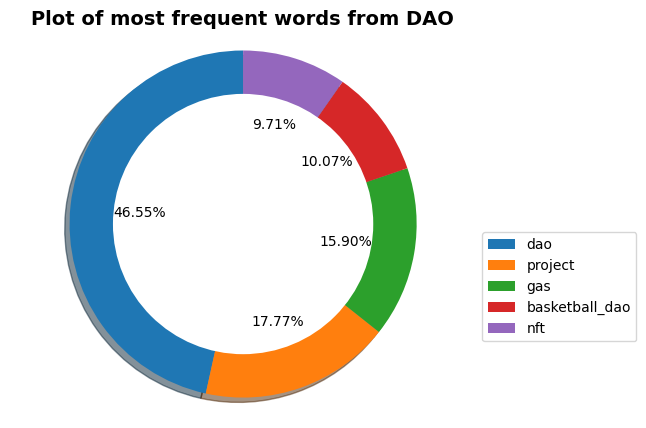

In [99]:
analyse_tweets_pie(dao)

In [182]:
finding_max(sybil)

The majority is sybil


What hashtag is provoded:Sybil


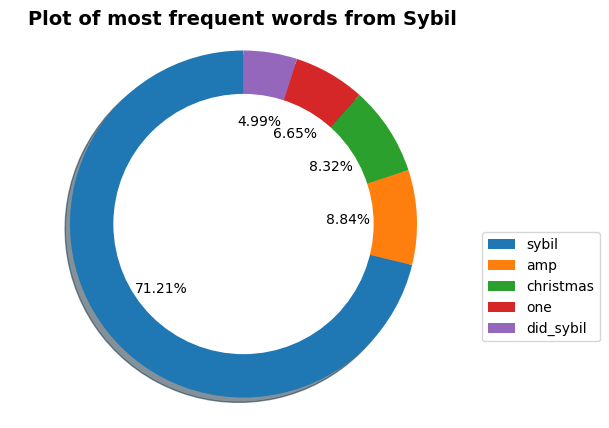

In [98]:
analyse_tweets_pie(sybil)

In [183]:
finding_max(token)

The majority is token


What hashtag is provoded:Token


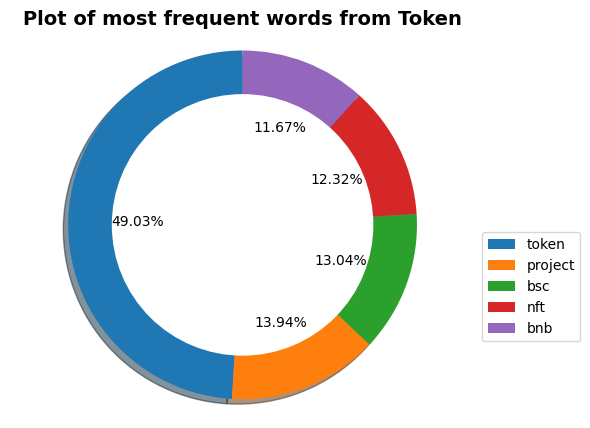

In [56]:
analyse_tweets_pie(token)

In [184]:
finding_max(internal)

The majority is not found.


In [31]:
### This is particularly for internal attack or external attack.

def find_counts(data, phrase):
    """
    This function is used to find the number of times a phrase is found in a string or a list of strings.
    """
    x = 0
    for i in range(len(data)):
        if phrase in data[i].lower():
            x += 1
            
    return print("There are {} of {}".format(x, phrase))


def phrase_freq(df, phrase):
    """
    This is used to find word frequency with the overall dataset.
    
    Here we will be using thisb function to find the frequency of internal attack and external attack because they are not just words, but phrases.
    """
    
    
    combined = tweets_combiner_tweets(df)
    
    tokenized = sent_tokenize(combined)
    
    # We use this to split the statement using commas because we need to find the end of each statement.
    statements = []
    for j in range(len(tokenized)):
        for i in range(len(tokenized[j].split(","))):
            statement = tokenized[j].split(",")[i]
            statements.append(statement)
            
            
    freq = find_counts(statements, phrase)
    
    return freq    



In [88]:
phrase_freq(internal, "internal attack")
phrase_freq(internal, "country")
phrase_freq(internal, "nomore")
phrase_freq(internal, "defend")
phrase_freq(internal, "new")

There are 441 of internal attack
There are 455 of country
There are 433 of nomore
There are 436 of defend
There are 455 of new


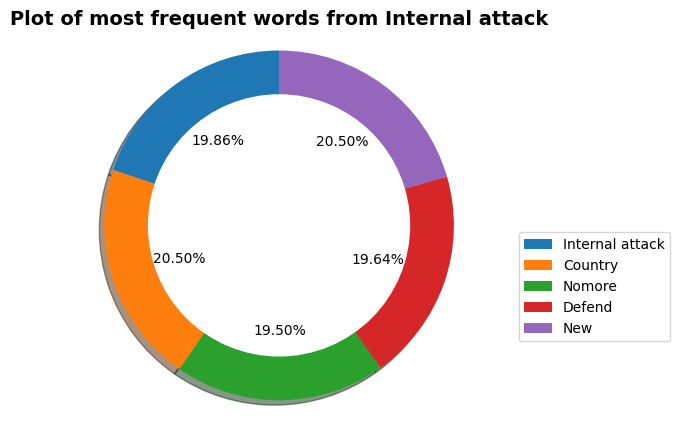

In [90]:
counts = [441, 455, 433, 436, 455]
labels = ["Internal attack", "Country", "Nomore", "Defend", "New"]
plt.figure(figsize=(6, 5))
plt.style.use("default")
plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("Plot of most frequent words from Internal attack", weight='bold', size=14)
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5))
plt.show()

In [95]:
phrase_freq(external, "external attack")
phrase_freq(external, "group")
phrase_freq(external, "column")
phrase_freq(external, "fifth")
phrase_freq(external, "forces")

There are 148 of external attack
There are 253 of group
There are 250 of column
There are 186 of fifth
There are 135 of forces


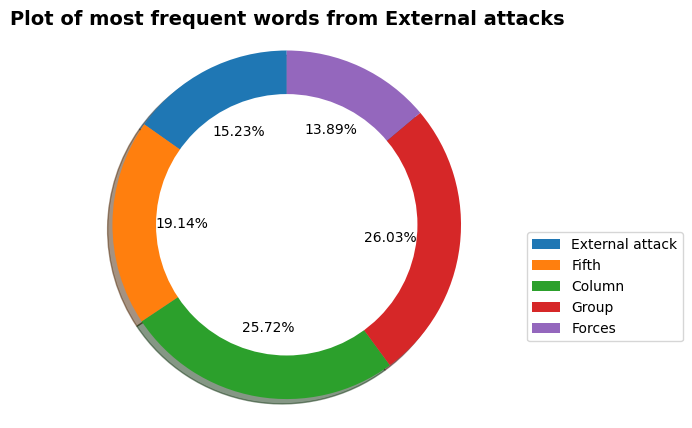

In [108]:
counts = [148, 186, 250, 253, 135]
labels = ["External attack", "Fifth", "Column", "Group", "Forces"]
plt.figure(figsize=(6, 5))
plt.style.use("default")
plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("Plot of most frequent words from External attacks", weight='bold', size=14)
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
plt.show()

Here the reason for this low count is that we are looking to get an instance where there is both internal/external attack and that is always going to reduce the probabilty of finding one smaller.

In [185]:
finding_max(external)

The majority is not found.


## Combining all the dataset

In [186]:
all_data = pd.concat([dao, fraud, sybil, attack, internal, external])

In [187]:
all_data.reset_index(inplace=True, drop=True)

In [188]:
finding_max(all_data)

The majority is not found.


In [192]:
def finding_max_websites(array): 
    combined = websites_combiner(array)
    tokenized_words = word_tokenizer(combined)
    no_punctuations = remove_punc(tokenized_words)
    words = remove_stopwords(no_punctuations)

    counts = pd.Series(words).value_counts()[:5]

    frequent_words = []
    for i in words:
        if i in counts.keys():
            frequent_words.append(i)

    lowered = [i.lower() for i in frequent_words]
    majority = findMajority(lowered, len(lowered))
    return print("The majority is", majority)

In [193]:
finding_max_websites(first_blog)

The majority is not found.


In [194]:
finding_max_websites(second_page)

The majority is not found.


## Observations

1. There are 2 conditions that must be met before the algorithm can return a word as the majority.
   The why most of them don't have majority is because they don't have up to N/2 of the dataset.
   
2. I reduced the words to five so that the dataset can be applicable to the algorithm.

3. The visualizations helps to understand the frequency of words and  why the algorithm returned some as not found and others returned the expected word.

### Decentalization

The implementatio of the Nakamoto coefficient is gotten from this link: https://github.com/ForkWatch/nakamoto-coefficient

The Shannon entropy and the Gini coefficient are calculated by the functions written below.

In [103]:
from nakamoto.sector import CustomSector

nakamoto_config = {
    'plot_notebook': True,
    'plot_image_path': "image.png"
}

custom_sector = CustomSector(counts.values, 
                 "ETC", 
                 'custom_sector_type',
                 **nakamoto_config)

gini = custom_sector.get_gini_coefficient()
print(gini)

-0.5848708502447899


In [104]:
import numpy as np
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [105]:
import collections
 
from scipy.stats import entropy
  
def estimate_shannon_entropy(dna_sequence):
    bases = collections.Counter([tmp_base for tmp_base in dna_sequence])
    # define distribution
    dist = [x/sum(bases.values()) for x in bases.values()]
 
    # use scipy to calculate entropy
    entropy_value = entropy(dist, base=2)
 
    return entropy_value

In [71]:
def gini_nakamoto_shannon(data):
    dao_tweets = tweets_combiner_tweets(data)
    tokenized_words = word_tokenizer(dao_tweets)
    no_punctuations = remove_punc(tokenized_words)
    words = remove_stopwords(no_punctuations)
    lower_words = [i.lower() for i in words]
    counts = pd.Series(lower_words).value_counts()
    
    nakamoto_config = {
        'plot_notebook': True,
        'plot_image_path': "image.png"
    }

    custom_sector = CustomSector(counts.values, 
                     "ETC", 
                     'custom_sector_type',
                     **nakamoto_config)

    print("Gini_coefficient is ",gini(counts.values.astype(float)))
    
    nakamoto_coef = custom_sector.get_nakamoto_coefficient()
    print("nakamoto coefficient is ",nakamoto_coef)
    
    print("Shannon entropy is ", estimate_shannon_entropy(counts.values))

In [72]:
gini_nakamoto_shannon(sybil)

Gini_coefficient is  0.47780560008137396
nakamoto coefficient is  5469
Shannon entropy is  1.820687114513711


In [73]:
gini_nakamoto_shannon(attack)

Gini_coefficient is  0.5099972697865001
nakamoto coefficient is  5879
Shannon entropy is  1.7913601637117704


In [74]:
gini_nakamoto_shannon(internal)

Gini_coefficient is  0.737543655205696
nakamoto coefficient is  2988
Shannon entropy is  1.4935745975656753


In [75]:
gini_nakamoto_shannon(external)

Gini_coefficient is  0.7208941210648911
nakamoto coefficient is  1442
Shannon entropy is  1.1174118806548055


In [76]:
gini_nakamoto_shannon(token)

Gini_coefficient is  0.6969135572821847
nakamoto coefficient is  4764
Shannon entropy is  2.1034487488886096


In [77]:
gini_nakamoto_shannon(fraud)

Gini_coefficient is  0.5699373483702335
nakamoto coefficient is  5766
Shannon entropy is  1.8595626950589186


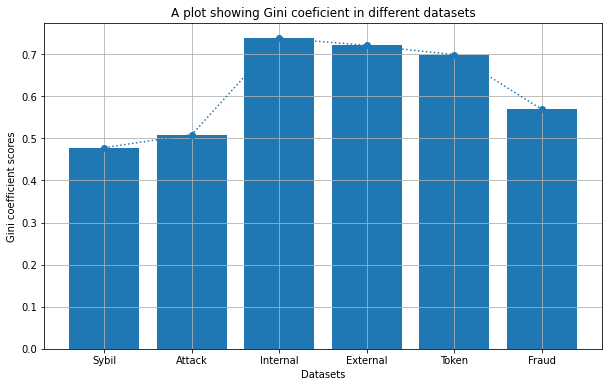

In [98]:
plt.figure(figsize=(10, 6))
plt.title("A plot showing Gini coeficient in different datasets")
plt.xlabel("Datasets")
plt.ylabel("Gini coefficient scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [0.478, 0.509, 0.738, 0.721, 0.699, 0.569], "o:");
plt.bar(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [0.478, 0.509, 0.738, 0.721, 0.699, 0.569]);
plt.grid()

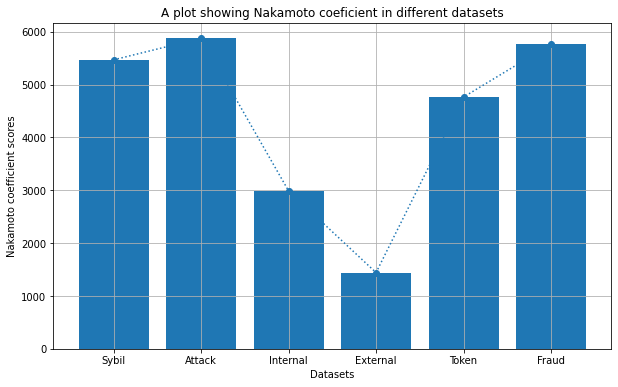

In [100]:
plt.figure(figsize=(10, 6))
plt.title("A plot showing Nakamoto coeficient in different datasets")
plt.xlabel("Datasets")
plt.ylabel("Nakamoto coefficient scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [5469, 5879, 2988, 1442, 4764, 5766], "o:");
plt.bar(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [5469, 5879, 2988, 1442, 4764, 5766]);
plt.grid()

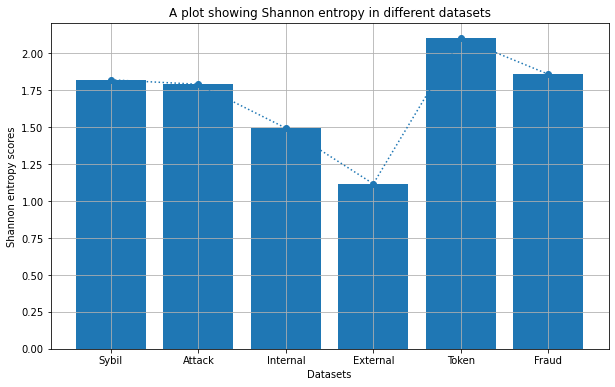

In [102]:
plt.figure(figsize=(10, 6))
plt.title("A plot showing Shannon entropy in different datasets")
plt.xlabel("Datasets")
plt.ylabel("Shannon entropy scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [1.821, 1.791, 1.494, 1.117, 2.103, 1.859], "o:");
plt.bar(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]);
plt.grid()

In [154]:
shannon = [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]
nakamoto = [5469, 5879, 2988, 1442, 4764, 5766]
gini = [0.478, 0.509, 0.738, 0.721, 0.699, 0.569]

metrics = pd.DataFrame(columns= ["Shannon", "Gini", "Nakamoto"])

In [158]:
metrics["Shannon"] = [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]
metrics["Nakamoto"] = [5469, 5879, 2988, 1442, 4764, 5766]
metrics["Gini"] = [0.478, 0.509, 0.738, 0.721, 0.699, 0.569]

In [161]:
metrics.drop("gini", inplace=True, axis=1)

In [162]:
metrics

Shannon   Gini  Nakamoto
0    1.821  0.478      5469
1    1.791  0.509      5879
2    1.494  0.738      2988
3    1.117  0.721      1442
4    2.103  0.699      4764
5    1.859  0.569      5766

The following cells of code is used to normalize and standardize the data in the metrics dataset to show the relationship of the metrics due to the variance in each scale.

## Normalized values

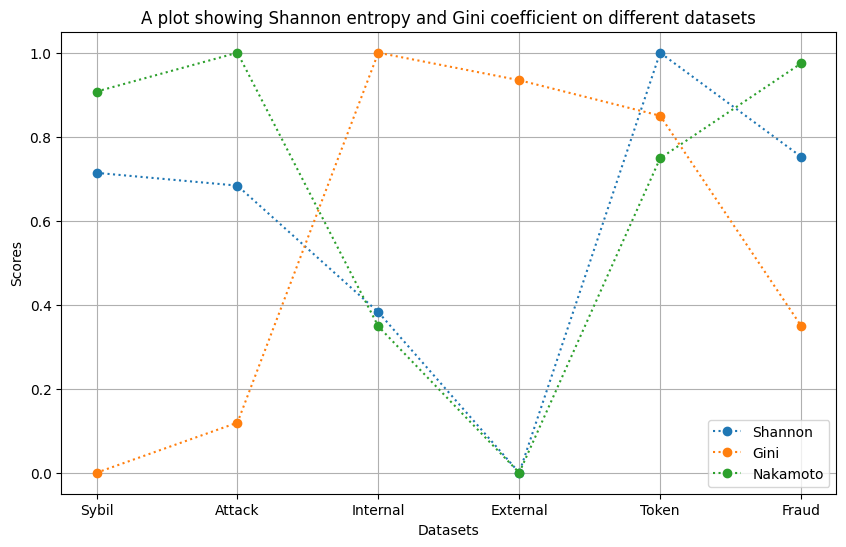

In [169]:
from sklearn.preprocessing import MinMaxScaler

normal_metrics = pd.DataFrame(MinMaxScaler().fit_transform(metrics),columns = ["Shannon", "Gini", "Nakamoto"])

plt.figure(figsize=(10, 6))
plt.title("Nakamoto coefficient, Shannon entropy and Gini coefficient on combined datasets")
plt.xlabel("Datasets")
plt.ylabel("Scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        normal_metrics.Shannon, "o:", label="Shannon");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        normal_metrics.Gini, "o:", label="Gini");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        normal_metrics.Nakamoto, "o:", label="Nakamoto");

plt.legend()
plt.grid()

### Standardized values

In [165]:
from sklearn.preprocessing import StandardScaler

standard_metrics = pd.DataFrame(StandardScaler().fit_transform(metrics),columns = ["Shannon", "Gini", "Nakamoto"])


In [166]:
standard_metrics

Shannon      Gini  Nakamoto
0  0.392873 -1.350060  0.662553
1  0.297438 -1.053239  0.913072
2 -0.647365  1.139413 -0.853395
3 -1.846662  0.976639 -1.798037
4  1.289959  0.765992  0.231781
5  0.513757 -0.478745  0.844026

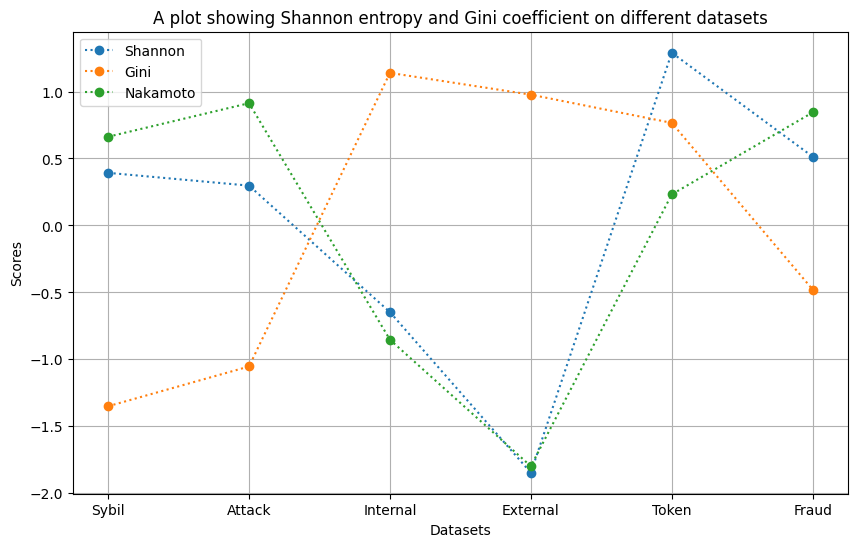

In [168]:
plt.figure(figsize=(10, 6))
plt.title("A plot showing Shannon entropy and Gini coefficient on different datasets")
plt.xlabel("Datasets")
plt.ylabel("Scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        standard_metrics.Shannon, "o:", label="Shannon");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        standard_metrics.Gini, "o:", label="Gini");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        standard_metrics.Nakamoto, "o:", label="Nakamoto");

plt.legend()
plt.grid()

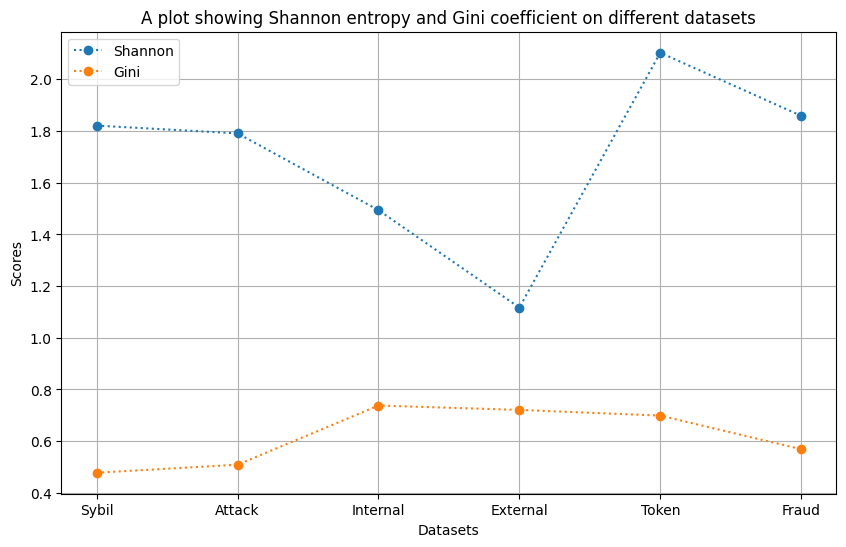

In [142]:
shannon = [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]
nakamoto = [5469, 5879, 2988, 1442, 4764, 5766]
gini = [0.478, 0.509, 0.738, 0.721, 0.699, 0.569]

plt.figure(figsize=(10, 6))
plt.title("A plot showing Shannon entropy and Gini coefficient on different datasets")
plt.xlabel("Datasets")
plt.ylabel("Scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        shannon, "o:", label="Shannon");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [0.478, 0.509, 0.738, 0.721, 0.699, 0.569], "o:", label="Gini");

plt.legend()
plt.grid()

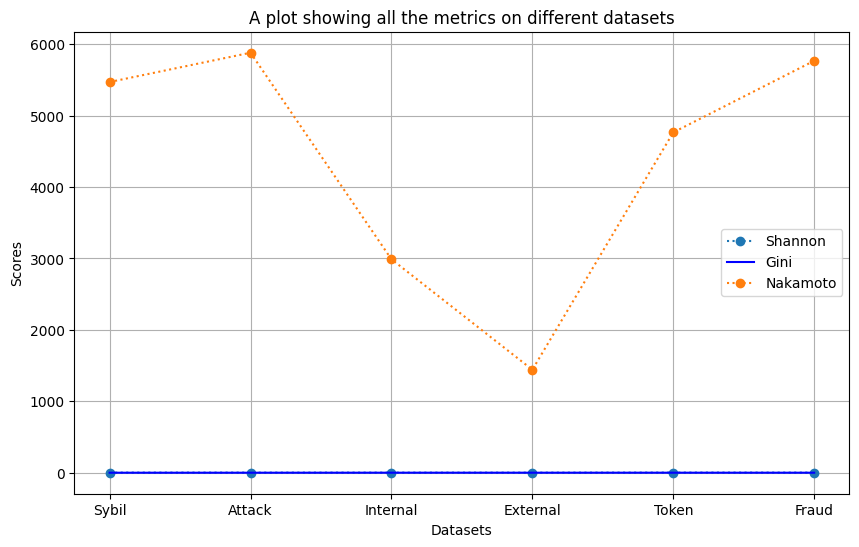

In [153]:
plt.figure(figsize=(10, 6))
plt.title("A plot showing all the metrics on different datasets")
plt.xlabel("Datasets")
plt.ylabel("Scores")
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        shannon, "o:", label="Shannon");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [0.478, 0.509, 0.738, 0.721, 0.699, 0.569], "b-", label="Gini");
plt.plot(["Sybil", "Attack", "Internal", "External", "Token", "Fraud"],
        [5469, 5879, 2988, 1442, 4764, 5766], "o:", label="Nakamoto" );

plt.legend()
plt.grid()

In [151]:
yticks = np.arange(0, 6000, 100)

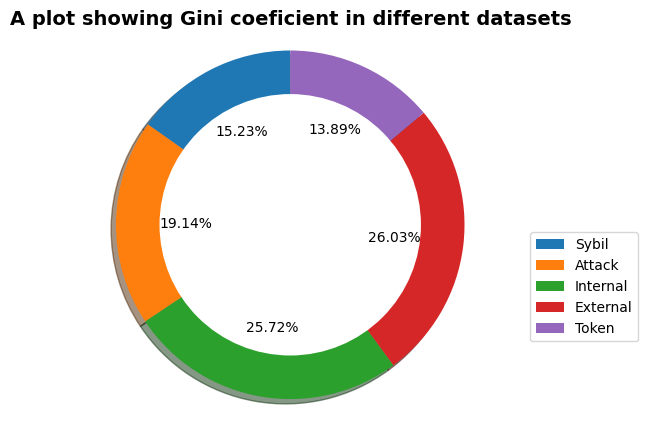

In [110]:
counts_data = [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]
labels = ["Sybil", "Attack", "Internal", "External", "Token", "Fraud"]
plt.figure(figsize=(6, 5))
plt.style.use("default")
plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("A plot showing Gini coeficient in different datasets", weight='bold', size=14)
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
plt.show()

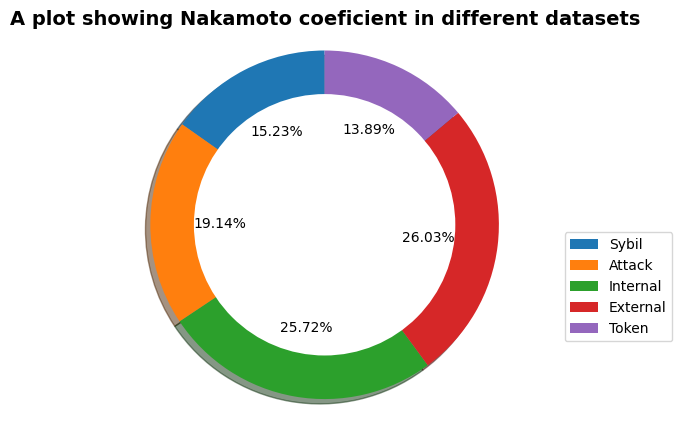

In [111]:
counts_data = [5469, 5879, 2988, 1442, 4764, 5766]
labels = ["Sybil", "Attack", "Internal", "External", "Token", "Fraud"]
plt.figure(figsize=(6, 5))
plt.style.use("default")
plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("A plot showing Nakamoto coeficient in different datasets", weight='bold', size=14)
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
plt.show()

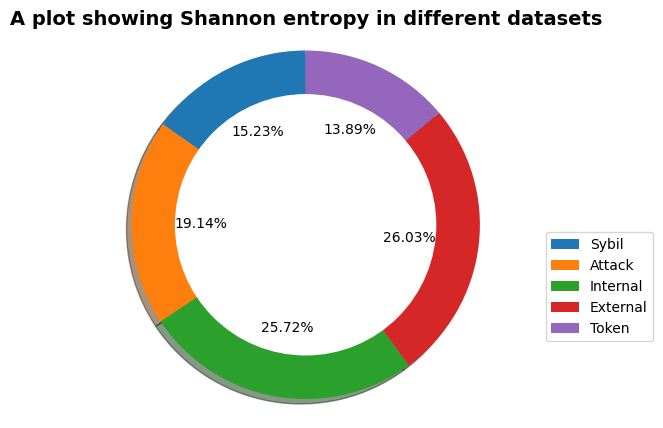

In [112]:
counts_data = [1.821, 1.791, 1.494, 1.117, 2.103, 1.859]
labels = ["Sybil", "Attack", "Internal", "External", "Token", "Fraud"]
plt.figure(figsize=(6, 5))
plt.style.use("default")
plt.pie(counts, autopct= "%.2f%%", shadow=True, startangle=90)
circle = plt.Circle(xy=(0,0), radius=.75, facecolor="white")
plt.gca().add_artist(circle)
plt.title("A plot showing Shannon entropy in different datasets", weight='bold', size=14)
plt.axis("equal")
plt.legend(labels=labels, loc="upper left", bbox_to_anchor=(1,0.5),)
plt.show()

Mathematical computation for Gini coefficient


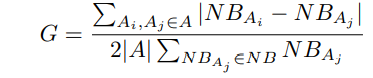

Mathematical computation for Shannon Entropy

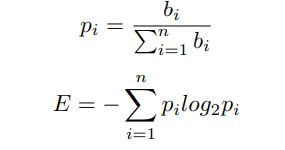

Mathematical computation for Nakamoto coefficient

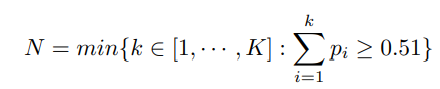